In [23]:
import os, sys
import numpy as np
import h5py
import json
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd

parent = os.path.abspath(os.getcwd() + "/../")
sys.path.append(parent)

from analyzer.model.utils.extracting import compute_region_size

gtfns_mouse = 'datasets/mouseA/mito_export_allgroups'

In [44]:
#sizef_mouse = compute_region_size(dprc='iter', fns=gtfns_mouse)

with h5py.File(parent + '/features/mouseA/sizef.h5', "r") as h5f:
    labels = np.array(h5f['id'], dtype=np.uint16)
        
    sizef_mouse = np.array(h5f['size'])
    print('Loaded {} features to cache.'.format('size'))
    
with h5py.File(parent + '/features/mouseA/slenf.h5', "r") as h5f:
    labels = np.array(h5f['id'], dtype=np.uint16)
        
    slenf_mouse = np.array(h5f['slen'])
    print('Loaded {} features to cache.'.format('skeleton length'))
    
with open(os.path.join(parent, 'features/mouseA/gt_vector_allgroups.json'), 'r') as f:
    gt_vector = json.loads(f.read())

Loaded size features to cache.
Loaded skeleton length features to cache.


In [47]:
vol_data = np.swapaxes(np.stack((sizef_mouse, gt_vector)), 0, 1)
dataset = pd.DataFrame({'label': labels, 'gt_label': gt_vector, 'vol': sizef_mouse, 'skeleton_len': slenf_mouse})

print(dataset)

       label  gt_label     vol  skeleton_len
0          1     22232  164709    535.056274
1          2     22232  116462    656.349348
2          3     22236    4833     29.257025
3          4     22236    6095     12.666822
4          5     22237   23904     66.130513
...      ...       ...     ...           ...
23269  22081     22236    1614      1.732051
23270  22085     22238    2662     18.055470
23271  23209     22279    3170      3.316625
23272  23210     22236    2223      1.732051
23273  23212     22238    1981      2.449490

[23274 rows x 4 columns]


<Figure size 3600x576 with 0 Axes>

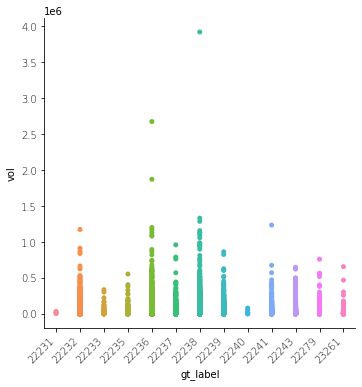

In [42]:
plt.figure(figsize=(50,8))

tmp = sb.catplot(x="gt_label", y="vol", jitter=False, data=dataset)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=10  
)
plt.yticks(
    fontweight='light',
    fontsize=10
)
#sb.catplot(x="gt_label", y="vol", kind="box", data=dataset)
tmp.savefig("output.svg")
